In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [12]:
#https://github.com/digipodium/datasets
data_url="https://raw.githubusercontent.com/digipodium/Datasets/main/Salary_Data.csv"
df=pd.read_csv(data_url)#index col make first col as index no col
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
df.shape

(30, 2)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

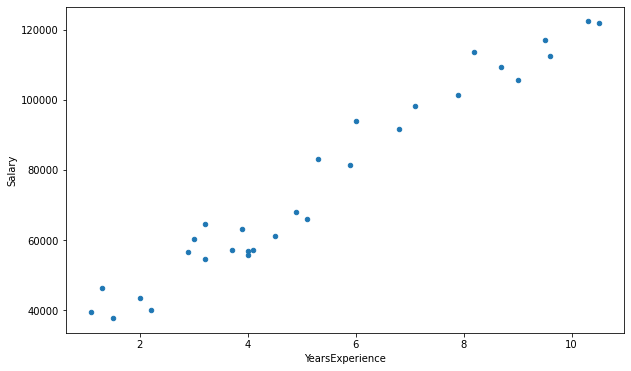

In [14]:

df.plot(x='YearsExperience',y='Salary',kind='scatter',figsize=(10,6))

In [15]:
#STEP 2(X AND Y)
X=df[['YearsExperience']] #2d vector
y=df['Salary']    #1d scaler

In [16]:
#step 3 (train test split) it gives 4 chunks
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1) #it will shuffle the all data and make all varibale content


In [17]:
#step 4 (algo setup)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain) #training the algo

LinearRegression()

In [18]:
#step 5 
# now we find score
score=reg.score(xtest,ytest) *100
print(f"the score is {score}% for ou model")

the score is 76.16681465472094% for ou model


In [19]:
#graphical representation of this data(original data vs predicted data)
df['predictions']=reg.predict(X) #for old data prediction is the new col
df.head()


,YearsExperience,Salary,predictions
0,1.1,39343.0,35876.137210
1,1.3,46205.0,37742.726158
2,1.5,37731.0,39609.315105
3,2.0,43525.0,44275.787474
4,2.2,39891.0,46142.376422


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

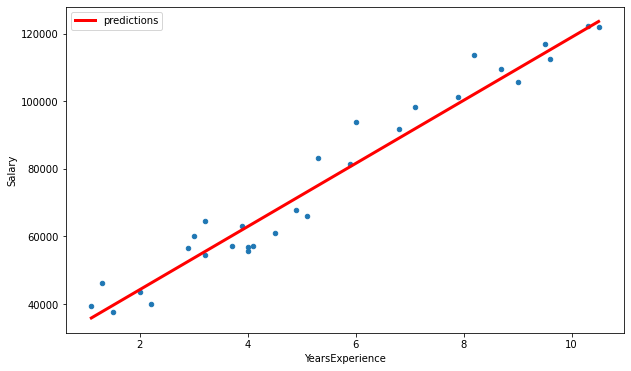

In [21]:
#plotting previous data graph and predictable graph in one graph(overlap)
ax=df.plot(kind='scatter',x='YearsExperience',y='Salary',figsize=(10,6))
df.plot(x='YearsExperience',y='predictions',ax=ax,color='red',linewidth=3)

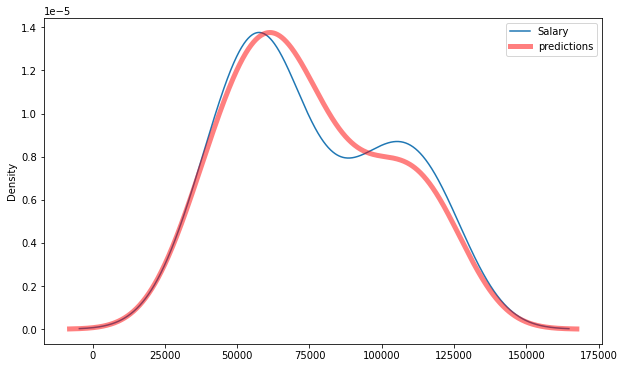

In [22]:
#SECOND WAY TO PLOT THE GRAPH
#kde (kernal densitty)
ax=df.plot(kind='kde',x='YearsExperience',y='Salary',figsize=(10,6))
df.plot(kind='kde',x='YearsExperience',y='predictions',ax=ax,color='red',alpha=.5,linewidth=5) #alpha is for transparency
plt.show()


In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
r2_score(df.Salary,df.predictions) #finds accuracy(orignal data, predicted value data)


0.9559200375146585

In [25]:
mean_absolute_error(df.Salary,df.predictions)

4683.968799235212

In [26]:
mean_squared_error(df.Salary,df.predictions)

32024060.20283364

In [27]:
from joblib import dump #for dumping the data to a file


In [28]:
dump(reg,"faltu_model_v2.pkl")

['faltu_model_v2.pkl']

In [29]:
reg

LinearRegression()

In [30]:
del reg

In [31]:
reg

NameError: name 'reg' is not defined

In [ ]:
from joblib import load

In [ ]:
reg=load("faltu_model_v2.pkl")

In [32]:
reg.predict([[2],[3]])


NameError: name 'reg' is not defined